In [25]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices

tips = sns.load_dataset("tips")


In [26]:
tips["tip_rate"]=tips["tip"]/tips["total_bill"]

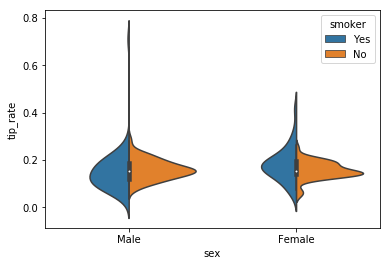

In [27]:
sns.violinplot(y="tip_rate", x="sex", hue= "smoker", split = True, data = tips)

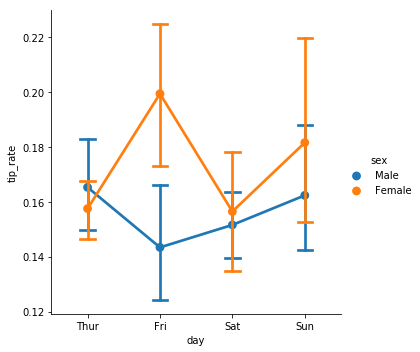

In [38]:
sns.catplot(y="tip_rate", x="day", hue="sex", kind="point", capsize=.2, data=tips)

In [39]:
y, X = dmatrices(, return_type='dataframe')

In [63]:
from statsmodels.formula.api import ols
mod = ols('tip_rate ~ C(sex) + C(day) + C(smoker) + C(time) + size', data=tips)

In [64]:
res = mod.fit()
table = sm.stats.anova_lm(res, typ=2)

In [65]:
#print(res.summary())
print(table)

             sum_sq     df         F    PR(>F)
C(sex)     0.003853    1.0  1.047333  0.307170
day        0.016399    3.0  1.485800  0.219064
C(smoker)  0.000674    1.0  0.183185  0.669041
C(time)    0.002946    1.0  0.800678  0.371802
size       0.019165    1.0  5.209381  0.023356
Residual   0.868246  236.0       NaN       NaN


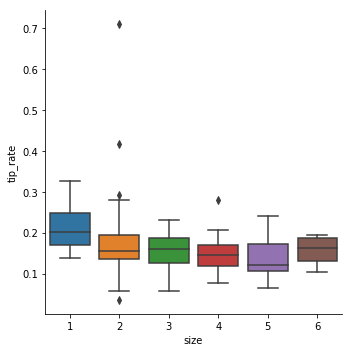

In [61]:
sns.catplot(x="size", y="tip_rate", kind="box",
            data=tips)

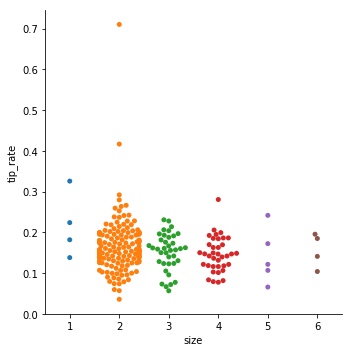

In [71]:
sns.catplot(x="size", y="tip_rate", kind="swarm",
            data=tips)

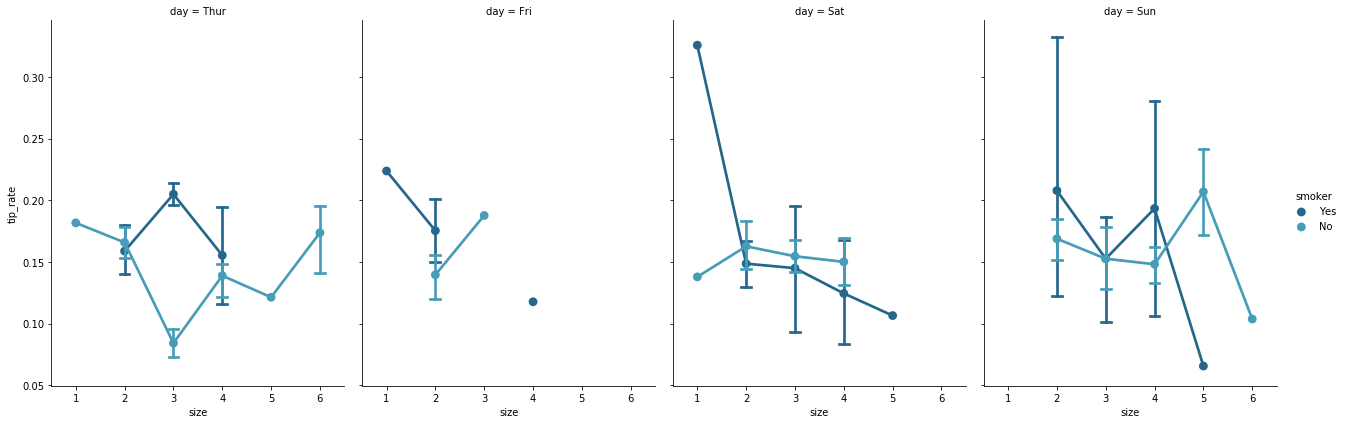

In [69]:
g = sns.catplot(x="size", y="tip_rate", hue="smoker", col="day",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=tips)

In [105]:
import pymc3 as pm

def our_mcmc(df,formula,family=pm.glm.families.Normal(),iterations=10000): 
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        pm.glm.GLM.from_formula(formula, df, family=family)

        # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
        start = pm.find_MAP()

        # Use the No-U-Turn Sampler
        step = pm.NUTS()
    
        # Calculate the trace
        trace = pm.sample(
            iterations, step, start, 
            random_seed=42, progressbar=True)
    
        return trace



In [111]:
trace = our_mcmc(tips,'tip_rate ~ C(sex) + C(day) + C(smoker) + size')

logp = 291.54, ||grad|| = 42.831: 100%|██████████| 36/36 [00:00<00:00, 1425.25it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, size, C(smoker)[T.No], C(day)[T.Sun], C(day)[T.Sat], C(day)[T.Fri], C(sex)[T.Female], Intercept]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:34<00:00, 1234.99draws/s]
The acceptance probability does not match the target. It is 0.8835910497848218, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8853414572334473, but should be close to 0.8. Try to increase the number of tuning steps.


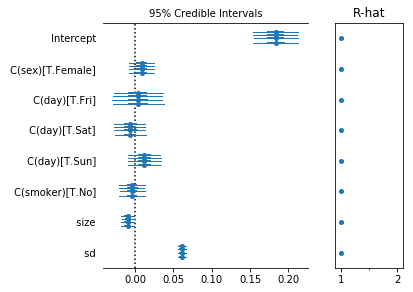

In [112]:
pm.forestplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b6074ef98>,
      dtype=object)

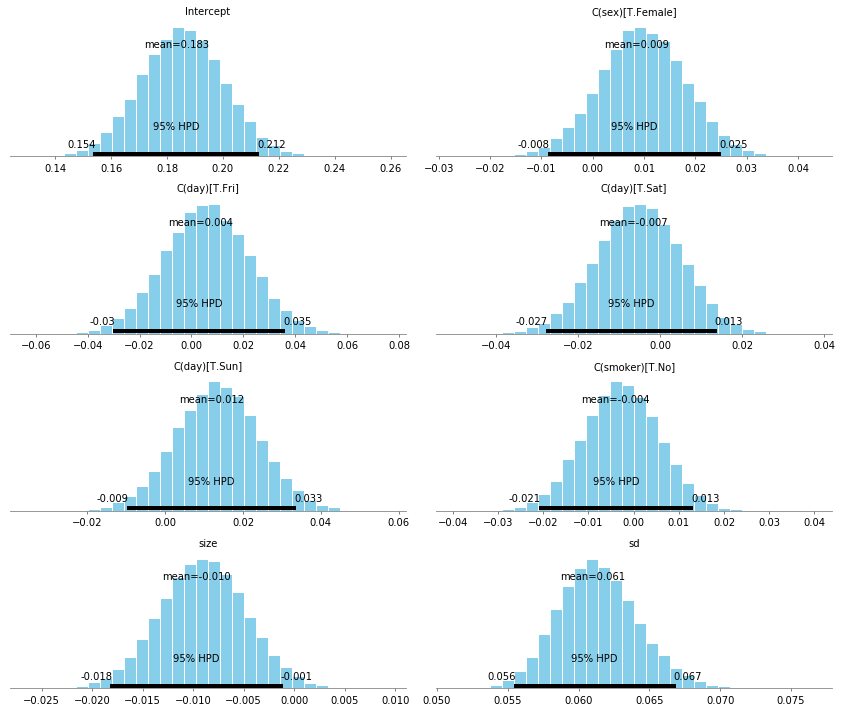

In [113]:
pm.plot_posterior(trace)

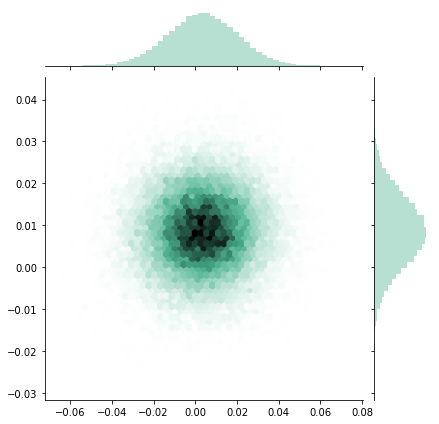

In [114]:
sns.jointplot(trace['C(day)[T.Fri]'], trace['C(sex)[T.Female]'], kind="hex", color="#4CB391")

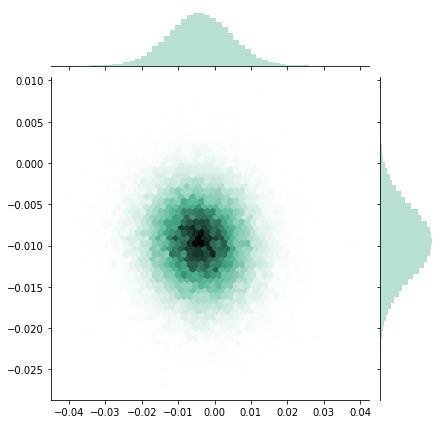

In [115]:
sns.jointplot(trace['C(smoker)[T.No]'], trace['size'], kind="hex", color="#4CB391")

In [93]:
trace = our_mcmc(tips,'tip_rate ~ C(sex) + C(day) + size',pm.glm.families.StudentT())

logp = 305.98, ||grad|| = 0.33203: 100%|██████████| 43/43 [00:00<00:00, 1609.15it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam, size, C(day)[T.Sun], C(day)[T.Sat], C(day)[T.Fri], C(sex)[T.Female], Intercept]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:34<00:00, 1216.29draws/s]
The acceptance probability does not match the target. It is 0.8861114531101117, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8874035669970664, but should be close to 0.8. Try to increase the number of tuning steps.


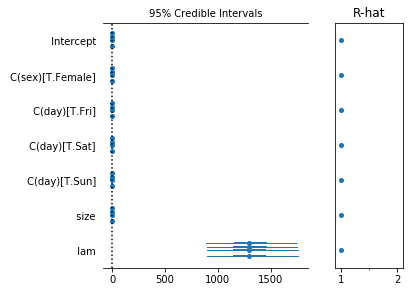

In [95]:
pm.forestplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bb16951d0>,
      dtype=object)

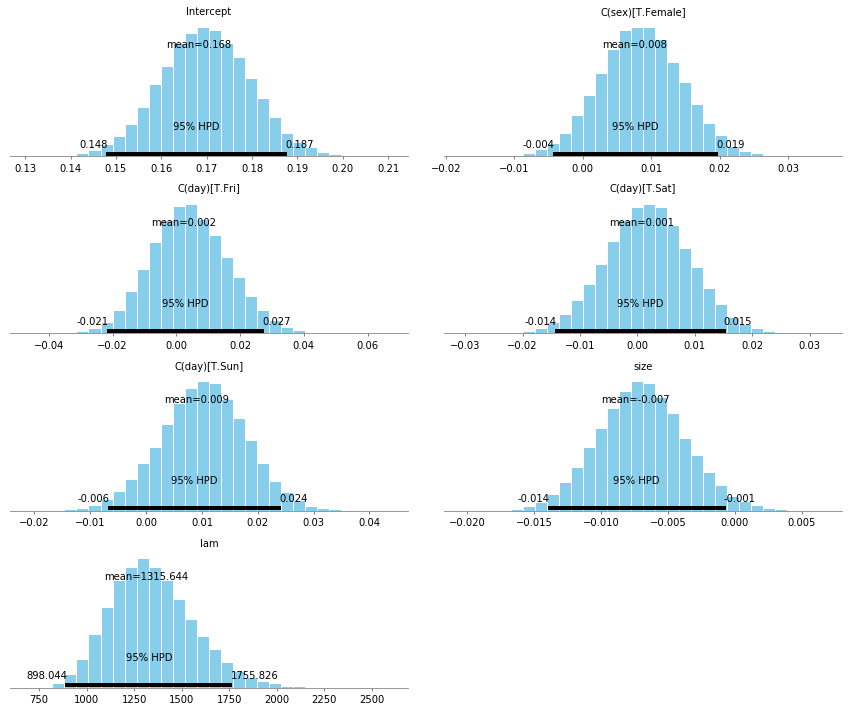

In [94]:
pm.plot_posterior(trace)

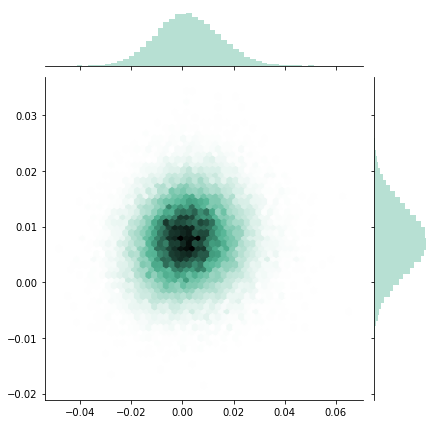

In [104]:
sns.jointplot(trace['C(day)[T.Fri]'], trace['C(sex)[T.Female]'], kind="hex", color="#4CB391")

In [99]:
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        pm.glm.GLM.from_formula('tip_rate ~ C(sex) + C(day) + size',tips,family=pm.glm.families.StudentT())
        basic_model

In [100]:
basic_model